In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from ast import literal_eval

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

# The following line is needed because of font errors
plt.rcParams['font.sans-serif'] = 'DengXian' # if this font is not available in your system, use 'SimHei'

In [2]:
def fake_tokenizer(tokens):
    return tokens

In [3]:
with open("tfidf_embeddings_sublinear.pkl", "rb") as infile:
    sublinear_tfidf_embedding = pickle.load(infile)

with open("tfidf_model_sublinear.pkl", "rb") as infile:
    sublinear_tfidf_model = pickle.load(infile)

sublinear_tfidf_embedding

<560x8438 sparse matrix of type '<class 'numpy.float64'>'
	with 92357 stored elements in Compressed Sparse Row format>

In [4]:
sublinear_tfidf_model

TfidfVectorizer(lowercase=False, sublinear_tf=True,
                tokenizer=<function fake_tokenizer at 0x000001FB00AD19D0>)

In [5]:
sublinear_tfidf_embedding.shape

(560, 8438)

In [6]:
plot_x = sublinear_tfidf_model.get_feature_names()

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
def correctly_read_csv(fname):
    prep_df = pd.read_csv(fname, converters={"tokens_rep": literal_eval, "tokens": literal_eval, "reference": literal_eval})
#     prep_df.tokens_rep = prep_df.tokens_rep.str.strip('[]').str.split(',')
#     prep_df.tokens = prep_df.tokens.str.strip('[]').str.split(',')
#     temp = prep_df.reference.str.strip('[]').str.split(',')
#     cleaned_ref_entries = []
#     for entry in temp:
#         if entry != ['']:
#             cleaned_ref_entries.append(entry)
#         else:
#             cleaned_ref_entries.append([])
#     prep_df.reference = cleaned_ref_entries
    return prep_df

In [8]:
prep_df = correctly_read_csv("processed_data.csv")

In [85]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    print(top_feats)
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [86]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [87]:
# Xtr is our TF-IDF embedding
# for scores per document, use top_feats_in_doc, then specify the document ID (index, actually)
# grp_ids=None means all documents, specify a list of group ids for specific document(s)
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [98]:
df_importance = top_mean_feats(sublinear_tfidf_embedding, sublinear_tfidf_model.get_feature_names(), None, 0.1, 50)

[('香蕉', 0.016215689448398192), ('水稻', 0.0138880659681584), ('稻熱病', 0.013548886385534586), ('公升', 0.013399853062222706), ('葉稻熱病', 0.012797026231756103), ('穗稻熱病', 0.012503419653892218), ('稻縱捲葉蟲', 0.010836626030431154), ('白葉枯病', 0.010481759776153465), ('公頃', 0.010465177164735056), ('檬果', 0.010316991580080925), ('稻', 0.009814106814801108), ('玉荷包荔枝', 0.009231453213970208), ('稻縱', 0.009114437399477728), ('紋枯病', 0.009032481250515803), ('小黃薊馬', 0.008688571888197888), ('花薊馬', 0.008344996087186668), ('套袋', 0.008284254210037806), ('噴', 0.007964043766835488), ('蕉株', 0.007704553276590005), ('果房', 0.007514096892979871), ('果實', 0.007449675566077496), ('公斤', 0.007326387115749128), ('花苞', 0.0070819180969863785), ('臺中區', 0.007043127531914358), ('蚜蟲', 0.006925218623557617), ('橙蜜香番茄', 0.006865100745265212), ('抽穗', 0.006755953166379859), ('東方果實蠅', 0.006739118856531094), ('動力', 0.006696974427011936), ('葉部', 0.006657179466838663), ('配方', 0.006535385225204962), ('臺東場', 0.0064174024402056835), ('臺南區', 0.006394

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [99]:
df_importance

,feature,tfidf
0,香蕉,0.016216
1,水稻,0.013888
2,稻熱病,0.013549
3,公升,0.013400
4,葉稻熱病,0.012797
5,穗稻熱病,0.012503
6,稻縱捲葉蟲,0.010837
7,白葉枯病,0.010482
8,公頃,0.010465
9,檬果,0.010317


In [108]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 12), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(14)
        
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=2, wspace=0.52)
    plt.show()

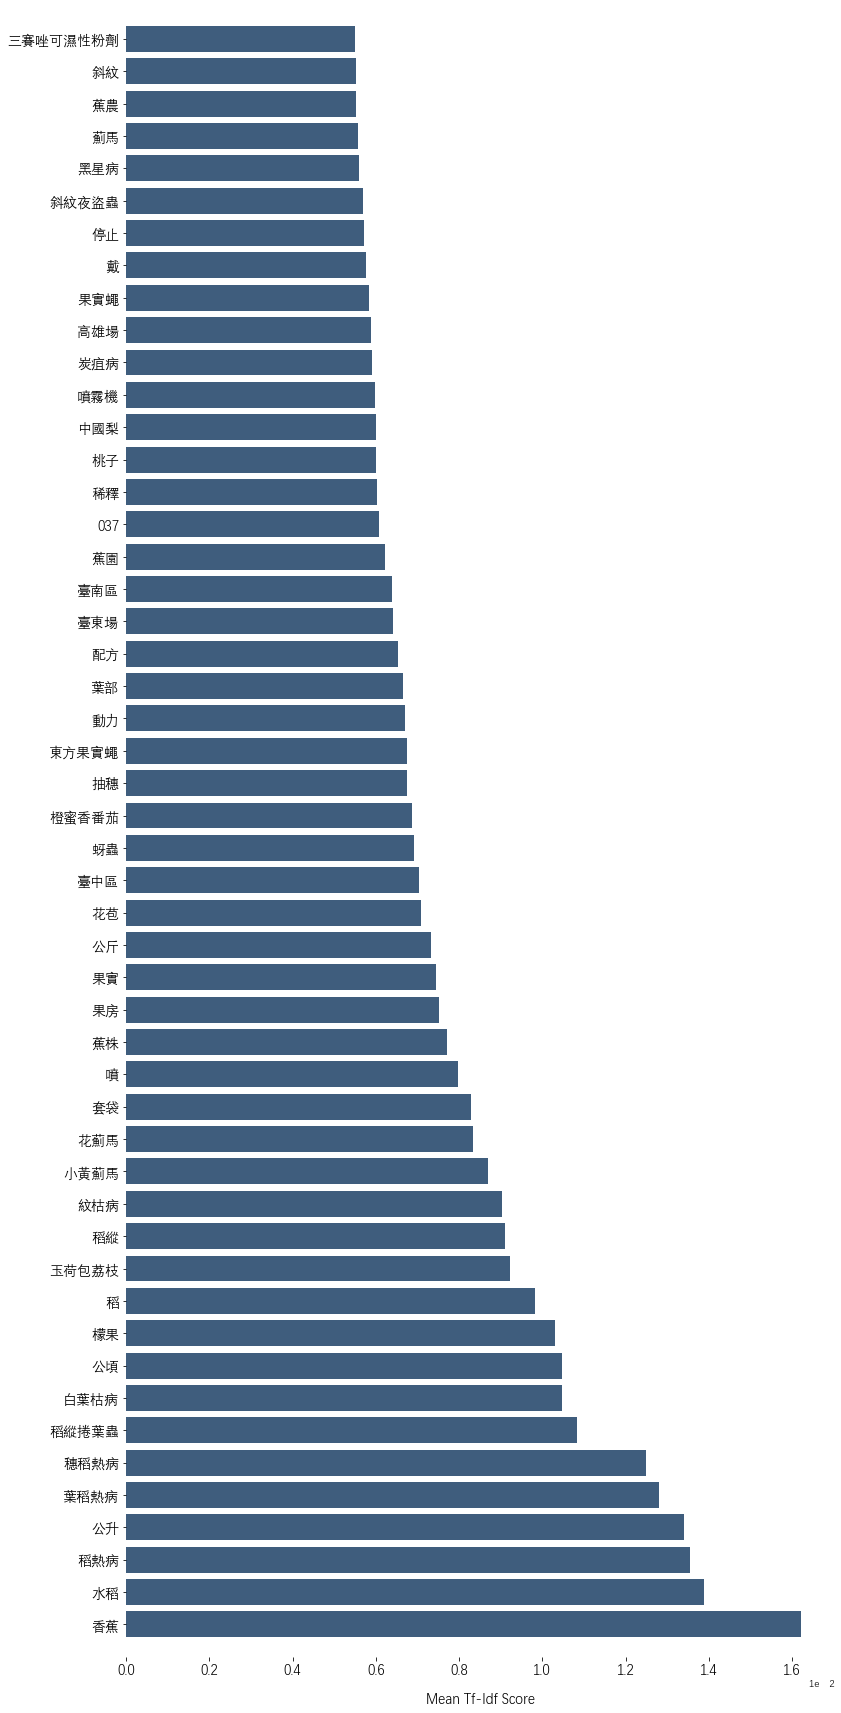

In [109]:
plot_tfidf_classfeats_h([df_importance])